## Predicting Profit using Multiple Linear Regression Model



**50 Startups have information on their research and development expenditures, their management expenditures, their marketing expenditures, the amount of profit they earned and the location where they were established. The aim is to estimate the amount of profit. This is a numerical estimation problem and our dependent variable is "Profit".**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
import statsmodels.api as sm




**Let's assign our data frame in the directory to the startups variable. Let's start using the startups variable by copying it to the df variable.**



In [2]:
url = 'https://raw.githubusercontent.com/pradeep3114/DataSets/main/50_Startups.csv' 
df = pd.read_csv(url,encoding = 'unicode_escape')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
df=df.rename(columns ={'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms'}, inplace =False)

In [4]:
df.head()

,rd,ad,ms,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
Investment = df.loc[:,['rd','ad','ms']]
Investment.head()

,rd,ad,ms
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [6]:
Investment['Total_investment'] = Investment.sum(axis=1)

In [7]:
Investment

,rd,ad,ms,Total_investment
0,165349.20,136897.80,471784.10,774031.10
1,162597.70,151377.59,443898.53,757873.82
2,153441.51,101145.55,407934.54,662521.60
3,144372.41,118671.85,383199.62,646243.88
4,142107.34,91391.77,366168.42,599667.53
5,131876.90,99814.71,362861.36,594552.97
6,134615.46,147198.87,127716.82,409531.15
7,130298.13,145530.06,323876.68,599704.87
8,120542.52,148718.95,311613.29,580874.76
9,123334.88,108679.17,304981.62,536995.67


In [8]:
Investment['Total_investment'].mean()  

406091.35300000006

In [9]:
df['Profit'].mean()

112012.63920000002

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rd      50 non-null     float64
 1   ad      50 non-null     float64
 2   ms      50 non-null     float64
 3   Profit  50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [11]:
df.shape

(50, 4)

In [12]:
df.isna().sum()

rd        0
ad        0
ms        0
Profit    0
dtype: int64

In [13]:
df.corr()


,rd,ad,ms,Profit
rd,1.000000,0.241955,0.724248,0.972900
ad,0.241955,1.000000,-0.032154,0.200717
ms,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [14]:
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:>

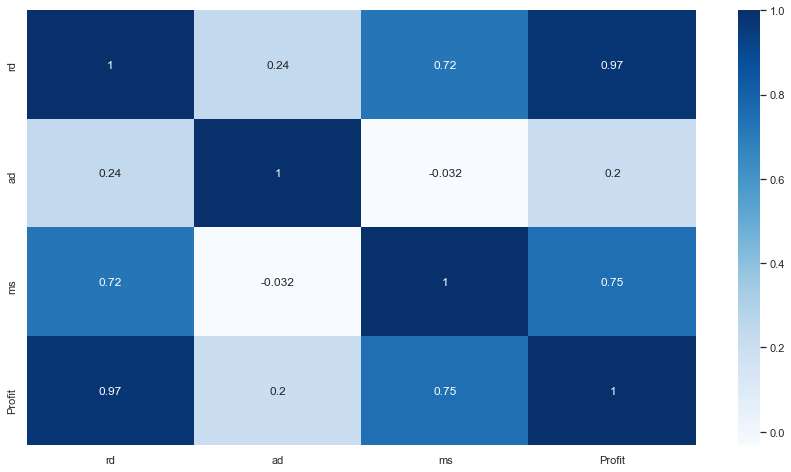

In [15]:
sns.heatmap(df.corr(),annot = True,cmap='Blues')


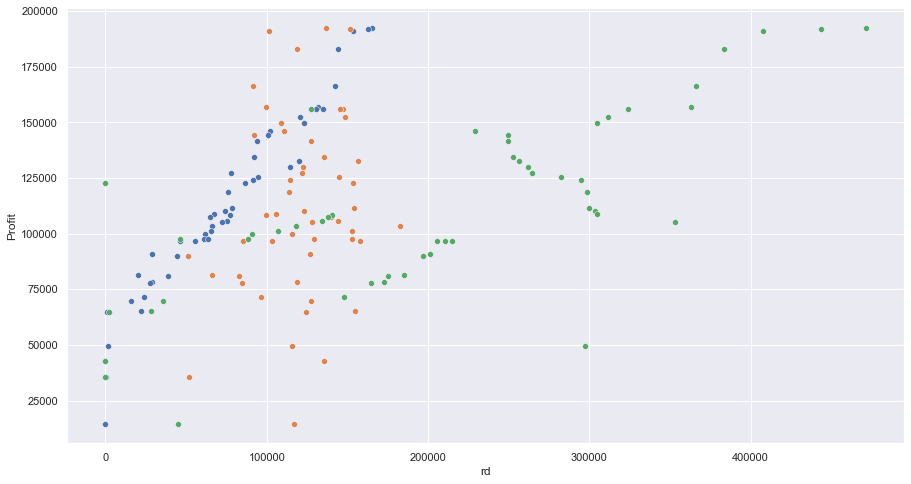

In [16]:
sns.scatterplot(x="rd", y="Profit", data=df)
sns.scatterplot(x="ad", y="Profit", data=df) 
sns.scatterplot(x="ms", y="Profit", data=df) 

plt.show()



array([[<AxesSubplot:title={'center':'rd'}>,
        <AxesSubplot:title={'center':'ad'}>],
       [<AxesSubplot:title={'center':'ms'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

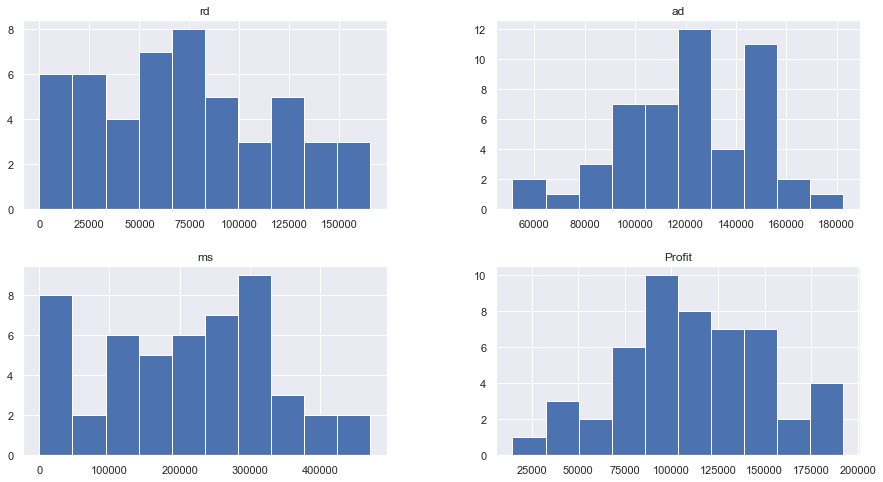

In [18]:
df.hist()

In [ ]:
sns.pairplot(data=df)
plt.show()

In [ ]:
df.describe().T

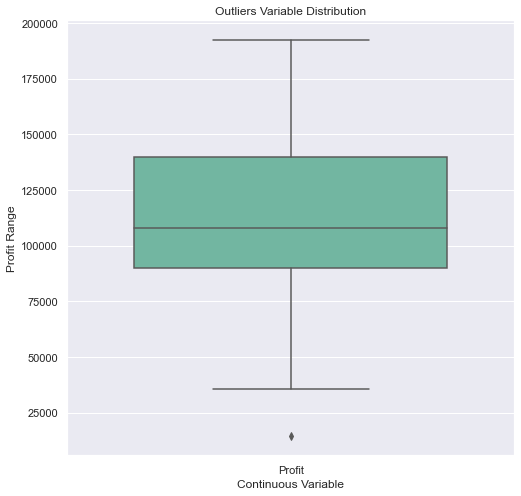

In [19]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

**Let's divide our data frame into dependent and independent variables.**

In [20]:
X = df.drop("Profit", axis = 1)     
Y = df["Profit"]

In [21]:
X.head()

,rd,ad,ms
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [22]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

 **Let's create 4 parts, train and test, from these dependent and independent variables. Let's use train_test_split to do this**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, shuffle=1)

**Lets check 4 part variables**

In [24]:
X_train[0:10]

,rd,ad,ms
12,93863.75,127320.38,249839.44
4,142107.34,91391.77,366168.42
37,44069.95,51283.14,197029.42
8,120542.52,148718.95,311613.29
3,144372.41,118671.85,383199.62
6,134615.46,147198.87,127716.82
41,27892.92,84710.77,164470.71
46,1315.46,115816.21,297114.46
47,0.00,135426.92,0.00
15,114523.61,122616.84,261776.23


In [25]:
X_test[0:10]

,rd,ad,ms
13,91992.39,135495.07,252664.93
39,38558.51,82982.09,174999.30
30,61994.48,115641.28,91131.24
45,1000.23,124153.04,1903.93
17,94657.16,145077.58,282574.31
48,542.05,51743.15,0.00
26,75328.87,144135.98,134050.07
25,64664.71,139553.16,137962.62
32,63408.86,129219.61,46085.25
19,86419.70,153514.11,0.00


In [26]:
Y_train[0:10]

12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
6     156122.51
41     77798.83
46     49490.75
47     42559.73
15    129917.04
Name: Profit, dtype: float64

In [27]:
Y_test[0:10]

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

**Let's include LinearRegression in the kernel and build the model.**

In [28]:
lm = LinearRegression()

In [29]:
model = lm.fit(X_train, Y_train)

**Let's make the model predict the dependent test variable that it has not seen before. Let's assign these prediction values to the y_pred variable.**

In [30]:
Y_pred = lm.predict(X_test)


**Let's collect the estimates and actual values in a data frame and take a look at it.**

In [31]:
df_comp = pd.DataFrame({'Actual Values': Y_test, 'Estimates': Y_pred})
df_comp

,Actual Values,Estimates
13,134307.35,126703.027165
39,81005.76,84894.750816
30,99937.59,98893.418160
45,64926.08,46501.708150
17,125370.37,129128.397344
48,35673.41,50992.694863
26,105733.54,109016.553658
25,107404.34,100878.464145
32,97427.84,97700.596386
19,122776.86,113106.152922


**Let's include the metrics hosted by sklearn in the kernel and display the MAE, MSE, RMSE values.**

In [32]:
MAE = mean_absolute_error(Y_test, Y_pred)   # The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction.
MAE

6979.1522523704025

In [33]:
MSE = mean_squared_error(Y_test, Y_pred)    # The average squared difference between the estimated values and the actual value.
MSE

80926321.22295167

In [34]:
RMSE = math.sqrt(MSE)    # To evaluate quality of prediction. shows how far predictions fall from measured true values using Euclidean distance.
RMSE

8995.90580336142

**Let's print the R Squared value of the model over the training data.**

In [35]:
model.score(X, Y)

0.9496916573955003

**we can also use stats model to see which attributes are significant for the model with 95% confidence. New results can be compared by retraining the model by performing some feature selection operations.**

Finding the profit of a startup that invested in following ratio:
>   R&D = 165444

>   Administration = 90000

>   Marketing = 300000





In [36]:
new_data=pd.DataFrame({'rd':165444,"ad":90000,"ms":300000},index=[1])

In [37]:
Profit = model.predict(new_data)
print('Our Prediction of Profit in startup is :',Profit)

Our Prediction of Profit in startup is : [190311.17233246]


In [38]:
print('Our Range of Profit lies Between',(Profit - RMSE),'to',(RMSE + Profit))

Our Range of Profit lies Between [181315.2665291] to [199307.07813583]
